<a href="https://colab.research.google.com/github/RoginRobert2014/CE888/blob/main/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Loading the training data set     
data_dir = "/content/drive/MyDrive/Colab Notebooks/CE888/Training"

In [ ]:
# Read a sample image
image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/CE888/sample.jpg')

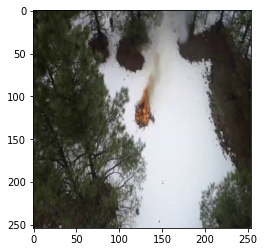

In [ ]:
# Display the image
plt.imshow(image)

In [ ]:
# Give the batch size and image dimensions
batch_size = 32
img_height = 254
img_width = 254


In [ ]:
# Let's use 80% of the images for training, and 20% for validation.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 39376 files belonging to 2 classes.
Using 31501 files for training.


In [ ]:
# Let's use 20% of the images for validation.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 39376 files belonging to 2 classes.
Using 7875 files for validation.


In [ ]:
# List the number of classes in the training dataset
class_names = train_ds.class_names
print(class_names)

['Fire', 'No_Fire']


In [ ]:
# Apply Cache and prefetch to increase the performance of dataset
# auto_tune = tf.data.AUTOTUNE
auto_tune = 30
# shuffle 1000
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=auto_tune)
val_ds = val_ds.cache().prefetch(buffer_size=auto_tune)

In [ ]:
# Creating the model
number_classes = 2
model = Sequential([
    # Standardize the data in the [0, 1] range using a Rescaling layer                    
    layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(number_classes)
])

In [ ]:
# Compile the model using Adam optimizer and SparseCategoricalCrossentropy loss function
# Metrics argument is used to measure the training and validation accuracy for each training epoch.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Use model summary to view the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 254, 254, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 127, 127, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)       

In [ ]:
# Training the model with 2 epcoh's
epochs = 1
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs 
)
model.save('/content/drive/MyDrive/Colab Notebooks/CE888/filesv2') 

299/985 [========>.....................] - ETA: 2:58:15 - loss: 0.3716 - accuracy: 0.8888

In [ ]:
# Saving the model
model.save('/content/drive/MyDrive/Colab Notebooks/CE888/filesv2')            

In [ ]:
# Visualize the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs_range = range(epochs)

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Predict on unseen data
image_path = "/content/drive/MyDrive/Colab Notebooks/CE888/sample2.jpg"

In [ ]:
img = keras.preprocessing.image.load_img(
    image_path, target_size=(img_height, img_width)
)

In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
# Loading saved model
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CE888/filesv2')
model.summary()

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/CE888/sample.jpg"

In [ ]:
img = keras.preprocessing.image.load_img(
      image_path, target_size=(254, 254)
  )

In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("score: ",100 * np.max(score))

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/CE888/Test1"

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_ds = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_dir,target_size=(254,254),classes=['No_Fire', 'Fire'],batch_size=10,shuffle=False)
accuracy = model.predict(test_ds,steps=len(test_ds), verbose=0)
accuracy_score(test_ds.classes,np.argmax(accuracy, axis=1))